# Unsupervised Learning: Principal Component Analysis using USDA National Nutrient Database

## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


## Import Dataset

In [2]:
df = pd.read_csv('dataset/nndb_flat.csv').set_index('ID')
df

,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,,,,,,,,,,,,,,,,,,,,,
1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,0.00,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,5.41,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,73.14,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273


In [3]:
num_feature = df.describe().columns
cat_feature = ['FoodGroup', 'ShortDescrip', 'Descrip']

## Preprocessing

### Drop Null

In [4]:
df.isna().sum()[df.isna().sum() != 0]

CommonName        7555
MfgName           7058
ScientificName    7886
dtype: int64

In [5]:
df.dropna(axis='columns',inplace=True)

In [6]:
df.shape

(8618, 41)

### Correlation

In [7]:
corr = df.corr().abs()
sol = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
pd.DataFrame(sol,columns=['correlation']).reset_index()[:16]

,level_0,level_1,correlation
0,VitC_mg,VitC_USRDA,1.000000
1,Folate_mcg,Folate_USRDA,1.000000
2,Thiamin_mg,Thiamin_USRDA,1.000000
3,Magnesium_mg,Magnesium_USRDA,1.000000
4,VitE_mg,VitE_USRDA,1.000000
5,Selenium_mcg,Selenium_USRDA,1.000000
6,Copper_mcg,Copper_USRDA,1.000000
7,VitA_mcg,VitA_USRDA,1.000000
8,Niacin_mg,Niacin_USRDA,1.000000
9,Riboflavin_mg,Riboflavin_USRDA,1.000000


In [8]:
df.drop(df.columns[df.columns.str.contains('_USRDA')].values, inplace=True, axis=1)
num_feature = df.describe().columns

corr = df.corr().abs()
sol = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
pd.DataFrame(sol,columns=['correlation']).reset_index()[:16]

,level_0,level_1,correlation
0,Energy_kcal,Fat_g,0.806795
1,Niacin_mg,Riboflavin_mg,0.746736
2,VitB6_mg,Niacin_mg,0.714143
3,Riboflavin_mg,Thiamin_mg,0.633719
4,Carb_g,Sugar_g,0.615344
5,Niacin_mg,Thiamin_mg,0.601829
6,VitB6_mg,Riboflavin_mg,0.581678
7,VitA_mcg,VitB12_mcg,0.581004
8,Folate_mcg,Riboflavin_mg,0.570748
9,VitB12_mcg,Copper_mcg,0.570642


### Data Distribution

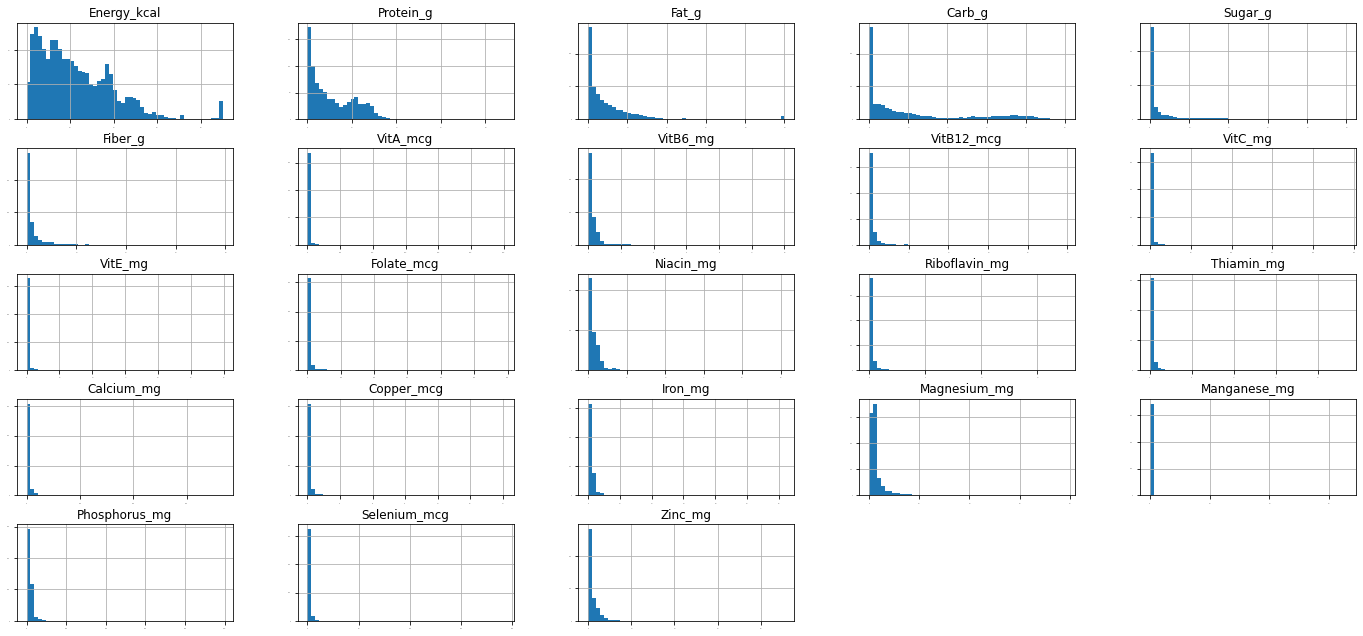

In [9]:
%matplotlib inline
ax = df.hist(bins=50, xlabelsize=-5, ylabelsize=-5, figsize=(24,11))

### Standard Scaler

In [10]:
df_TF = StandardScaler().fit_transform(df[num_feature])

print('mean:',np.round(df_TF.mean()))
print('standard deviation:',np.round(df_TF.std()))

mean: 0.0
standard deviation: 1.0


In [11]:
pd.DataFrame(df_TF, columns=num_feature)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,2.896234,-1.011747,4.441289,-0.798867,-0.477914,-0.469058,0.757113,-0.546128,-0.244334,-0.137643,...,-0.451809,-0.395218,-0.245398,-0.311347,-0.467425,-0.548385,-0.079028,-0.649918,-0.410557,-0.559918
1,2.896234,-1.011747,4.441289,-0.798867,-0.477914,-0.469058,0.757113,-0.546128,-0.253595,-0.137643,...,-0.451809,-0.395218,-0.245398,-0.282415,-0.442978,-0.548385,-0.078401,-0.654842,-0.410557,-0.571830
2,3.834956,-1.065776,5.599153,-0.801069,-0.482325,-0.469058,0.957289,-0.550307,-0.281380,-0.137643,...,-0.516275,-0.402935,-0.344726,-0.309539,-0.470917,-0.584057,-0.079028,-0.753325,-0.445904,-0.583742
3,0.747208,0.936124,1.140402,-0.715158,-0.445564,-0.469058,0.133490,-0.205541,-0.001218,-0.137643,...,0.321775,-0.348916,2.257682,-0.239017,-0.416784,-0.173821,-0.077618,1.137542,0.066632,0.205414
4,0.853478,1.110532,1.199651,-0.698637,-0.444829,-0.469058,0.254109,-0.416579,0.008044,-0.137643,...,0.252864,-0.377855,2.982780,-0.267949,-0.395829,-0.155984,-0.077148,1.452687,0.066632,0.187546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,0.463820,0.661242,0.910973,-0.801069,-0.482325,-0.469058,-0.060269,0.304294,2.494770,-0.137643,...,-0.105030,-0.366279,-0.036808,-0.130522,-0.226446,0.486125,-0.079028,0.482632,2.148587,-0.259146
8614,-0.681540,0.854607,-0.618138,-0.602446,-0.482325,-0.469058,-0.118012,-0.318374,0.214113,-0.137643,...,-0.474039,-0.381713,-0.314928,-0.251675,-0.369636,0.075888,-0.074484,1.329583,0.321132,-0.125138
8615,0.251279,-1.092316,-0.671083,1.884207,4.899510,-0.469058,-0.120578,-0.552396,-0.283695,-0.137643,...,-0.394013,-0.154063,-0.300029,-0.275182,0.157724,-0.405694,-0.079028,-0.728704,-0.421161,-0.530139
8616,-0.805522,0.433753,-0.582841,-0.727641,-0.482325,-0.469058,-0.082083,-0.280763,-0.167926,-0.137643,...,-0.260636,-0.385572,-0.314928,0.411953,0.140262,3.875036,-0.079028,0.571267,0.522612,-0.288925


## PCA

In [12]:
fit = PCA()
pca = fit.fit_transform(df_TF)

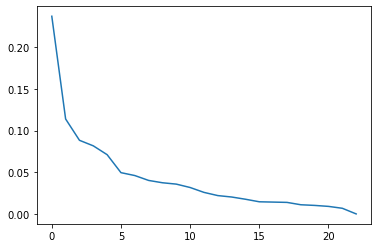

In [13]:
plt.plot(fit.explained_variance_ratio_)

In [14]:
print(fit.explained_variance_ratio_)
print('the first 5 eigenvectors account for {} % of the variance and will be kept'.format(np.round(fit.explained_variance_ratio_[:5].sum(),2)))

[2.36925468e-01 1.13846015e-01 8.83433734e-02 8.17013669e-02
 7.11161480e-02 4.95813332e-02 4.61246638e-02 4.02719041e-02
 3.74790508e-02 3.58559322e-02 3.17927198e-02 2.59519549e-02
 2.21153503e-02 2.04113766e-02 1.77385355e-02 1.46927827e-02
 1.43290735e-02 1.39668837e-02 1.11392349e-02 1.03538827e-02
 9.18082227e-03 6.91711649e-03 1.65010749e-04]
the first 5 eigenvectors account for 0.59 % of the variance and will be kept


In [15]:
pca = pd.DataFrame(pca[:, :5], index=df.index)
pca = pca.join(df[cat_feature])
pca.rename(columns={0:'c1',1:'c2',2:'c3',3:'c4',4:'c5'}, inplace=True)

In [16]:
# we see that the five vectors are orthogonal
np.round(pca.corr(), 5)

,c1,c2,c3,c4,c5
c1,1.0,0.0,0.0,0.0,-0.0
c2,0.0,1.0,-0.0,0.0,-0.0
c3,0.0,-0.0,1.0,-0.0,0.0
c4,0.0,0.0,-0.0,1.0,0.0
c5,-0.0,-0.0,0.0,0.0,1.0


In [17]:
vects = fit.components_[:5]

In [18]:
pd.Series(vects[0], index=df[num_feature].columns).sort_values(ascending=False)[:5]

Riboflavin_mg    0.341325
Niacin_mg        0.337779
VitB6_mg         0.315663
Iron_mg          0.299857
Folate_mcg       0.284102
dtype: float64

In [19]:
pd.Series(vects[1], index=df[num_feature].columns).sort_values(ascending=False)[:5]

VitB12_mcg      0.355045
Protein_g       0.343397
Selenium_mcg    0.239322
VitA_mcg        0.236470
Copper_mcg      0.212669
dtype: float64

In [20]:
pd.Series(vects[2], index=df[num_feature].columns).sort_values(ascending=False)[:5]

Folate_mcg       0.230985
Riboflavin_mg    0.192098
Thiamin_mg       0.184351
VitB6_mg         0.174648
Niacin_mg        0.164885
dtype: float64

In [21]:
pd.Series(vects[3], index=df[num_feature].columns).sort_values(ascending=False)[:5]

VitA_mcg        0.530395
Copper_mcg      0.389929
VitB12_mcg      0.346550
Manganese_mg    0.311369
Sugar_g         0.217373
dtype: float64

In [22]:
pd.Series(vects[4], index=df[num_feature].columns).sort_values(ascending=False)[:5]

Calcium_mg       0.388692
Magnesium_mg     0.352742
Phosphorus_mg    0.344929
Fiber_g          0.332161
Copper_mcg       0.161241
dtype: float64

In [23]:
pca.sort_values(by='c1')['FoodGroup'][:500].value_counts()

Soups, Sauces, and Gravies             219
Beverages                              176
Vegetables and Vegetable Products       28
Fruits and Fruit Juices                 27
American Indian/Alaska Native Foods     11
Sweets                                   9
Spices and Herbs                         6
Baby Foods                               6
Legumes and Legume Products              6
Fats and Oils                            5
Dairy and Egg Products                   3
Meals, Entrees, and Side Dishes          2
Fast Foods                               1
Baked Products                           1
Name: FoodGroup, dtype: int64

In [24]:
pca.sort_values(by='c2')['FoodGroup'][:500].value_counts()

Sweets                                 170
Baked Products                         148
Breakfast Cereals                       53
Spices and Herbs                        26
Snacks                                  22
Beverages                               18
Fruits and Fruit Juices                 16
Fats and Oils                           14
Vegetables and Vegetable Products       12
Baby Foods                               7
Dairy and Egg Products                   5
Nut and Seed Products                    4
American Indian/Alaska Native Foods      3
Legumes and Legume Products              1
Cereal Grains and Pasta                  1
Name: FoodGroup, dtype: int64

In [25]:
pca.sort_values(by='c3')['FoodGroup'][:500].value_counts()

Fats and Oils                          148
Nut and Seed Products                   90
Dairy and Egg Products                  57
Legumes and Legume Products             50
Beef Products                           20
Lamb, Veal, and Game Products           20
Sweets                                  19
American Indian/Alaska Native Foods     17
Pork Products                           16
Snacks                                  15
Spices and Herbs                        14
Beverages                                8
Breakfast Cereals                        6
Finfish and Shellfish Products           5
Poultry Products                         4
Baked Products                           3
Cereal Grains and Pasta                  2
Baby Foods                               2
Soups, Sauces, and Gravies               1
Vegetables and Vegetable Products        1
Fast Foods                               1
Sausages and Luncheon Meats              1
Name: FoodGroup, dtype: int64

In [26]:
pca.sort_values(by='c4')['FoodGroup'][:500].value_counts()

Beef Products                          149
Pork Products                          107
Poultry Products                        39
Breakfast Cereals                       34
Dairy and Egg Products                  34
Lamb, Veal, and Game Products           25
American Indian/Alaska Native Foods     19
Legumes and Legume Products             18
Nut and Seed Products                   16
Finfish and Shellfish Products          12
Baby Foods                              10
Snacks                                   8
Spices and Herbs                         7
Baked Products                           5
Cereal Grains and Pasta                  4
Sweets                                   3
Beverages                                3
Vegetables and Vegetable Products        2
Fast Foods                               2
Restaurant Foods                         2
Sausages and Luncheon Meats              1
Name: FoodGroup, dtype: int64

In [31]:
pca.sort_values(by='c5')['FoodGroup'][:500].value_counts()

Fats and Oils                          170
Breakfast Cereals                      129
Pork Products                           29
Baked Products                          22
Lamb, Veal, and Game Products           21
Poultry Products                        21
Beef Products                           21
Legumes and Legume Products             19
Sausages and Luncheon Meats             18
Snacks                                  16
American Indian/Alaska Native Foods     14
Dairy and Egg Products                   5
Nut and Seed Products                    4
Sweets                                   3
Baby Foods                               2
Fast Foods                               2
Beverages                                2
Soups, Sauces, and Gravies               1
Vegetables and Vegetable Products        1
Name: FoodGroup, dtype: int64

## References
1. [USDA National Nutrient Database - data.world](https://data.world/craigkelly/usda-national-nutrient-db)
2. [List Highest Correlation Pairs from a Large Correlation Matrix in Pandas - Stackoverflow](https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas)